# DNA Case Study

The purpose of the following case study is analyzing the genome of the human cytomegalovirus (CMV). 

In researching the virusis, one of the main things that is important for scientists is finding the origin of replication (the place in the DNA that stores information on how to replicate creating new cells). The DNA can represented as a string of 4 letters that define the sequence of 4 types of nucleotides. It was found that some viruses from the family of CMV has the origin of replication in the largest DNA palyndrome and others have the one in the location where there are a lot of smaller palyndromes. 

As the data input we have an already found locations of startings of all palyndromes that have the length greater or equal than 10.

# Code

In [6]:
dna_length = 229354
palindrome_count = 296
min_pal_length = 10

## Reading data

In [7]:
cmv_locations = []

with open("data.txt") as file:
    while (line := file.readline().rstrip()):
        cmv_locations.append(int(line))

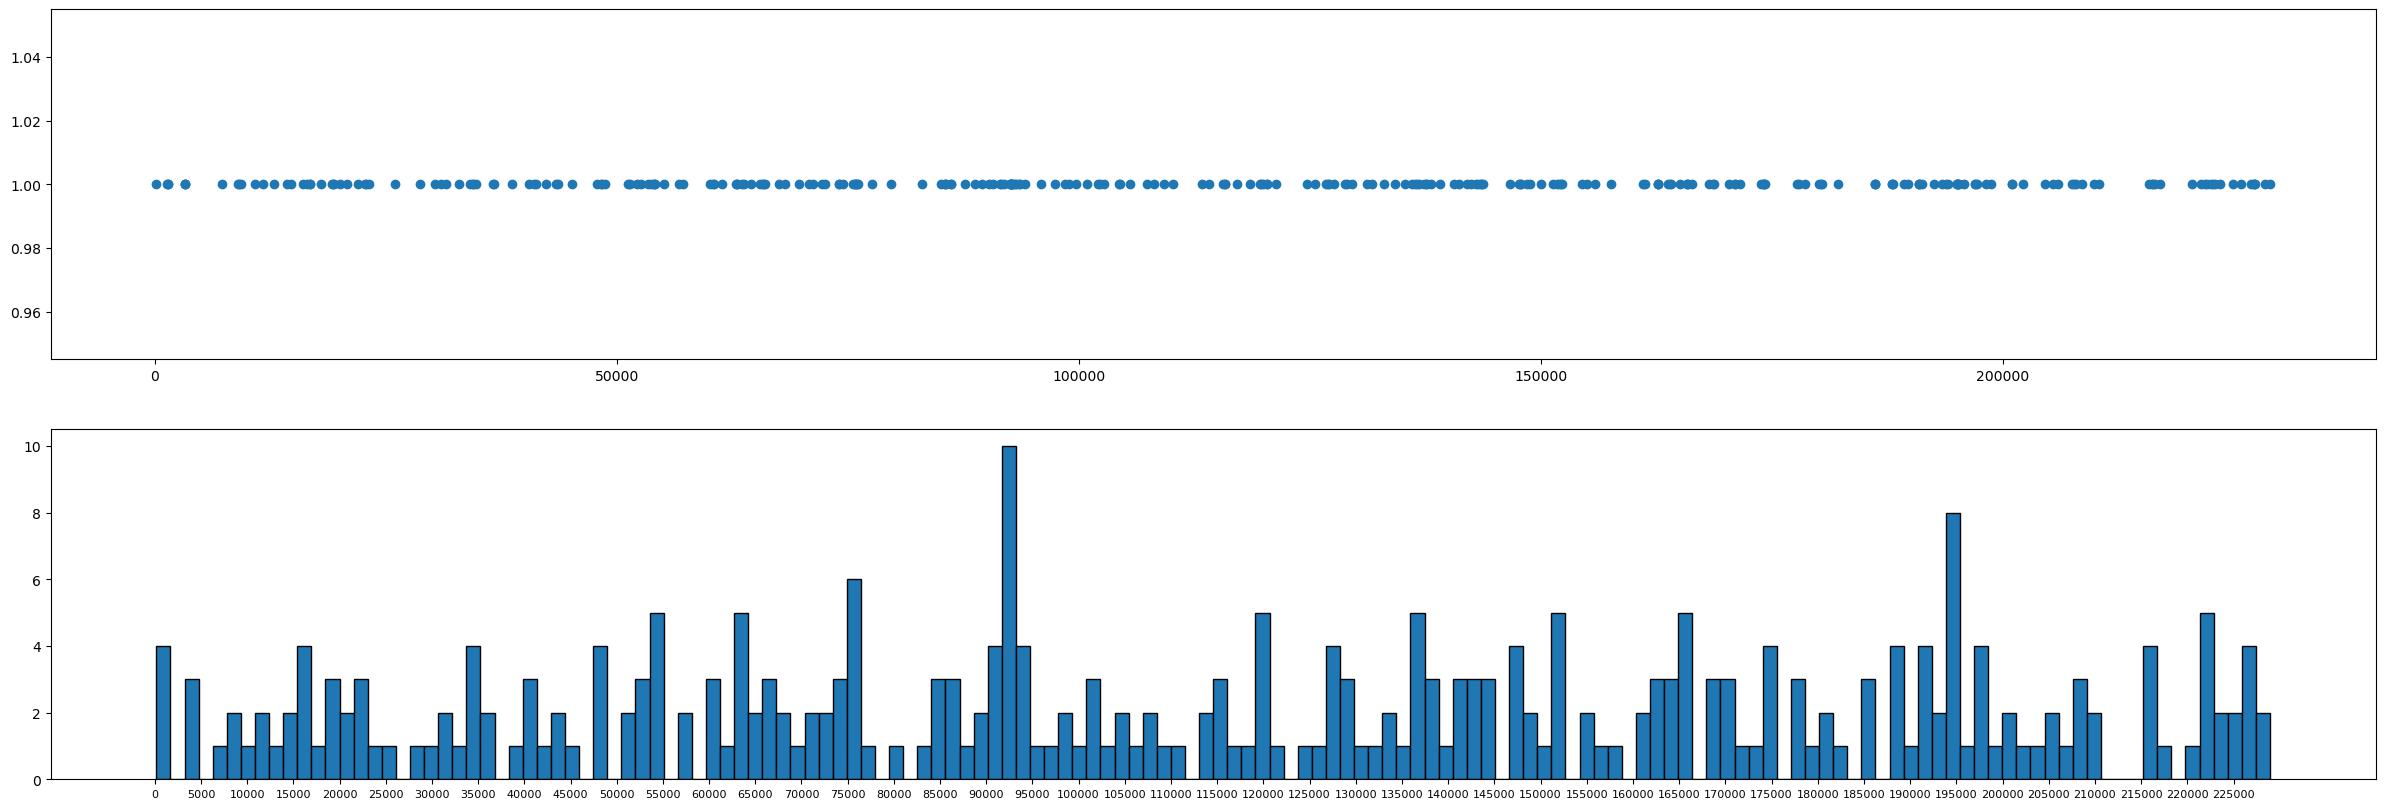

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
ax = plt.subplot(2,1,1)
plt.scatter(x=cmv_locations,y= [1] * len(cmv_locations))

plt.subplot(2,1,2)
plt.hist(x=cmv_locations, bins=150,edgecolor='black')
plt.xticks(range(0,dna_length,5000),fontsize=8)
plt.show()

From here we can see that in area around (90000, 95000) and (194000, 196000) we have big clusters of palindromes. This can be our places of interest to find the origin of replication.
Also, we can notice a smaller but quite significant cluster around 75500.

## Locations

Here I generate 5 random samples of 296 numbers from uniform distribution to compare them with the CMV palindrome palindromes.

I generated only 5 random samples because it is hard to visually compare things on a lot of graphs. And I did not use only one sample to have some difference and not get some deviated result just by chance. We always can rerun generation function and see plots with other generated data. We cannot just run the generator e.g. 1000 times and average the spacings because due to a uniform distribution which we take samples from the spacings tend to form just a straight line as well as counts and locations will become uniform.

In [9]:
import random

def generate_DNA_samples(n):
    samples = []
    population = range(1,dna_length - min_pal_length + 2)

    for i in range(n):
        sample = random.sample(population,palindrome_count)
        sample.sort()
        samples.append(sample)
    return samples

Orange plots below refer to CMV locations and blue ones to random sample ones

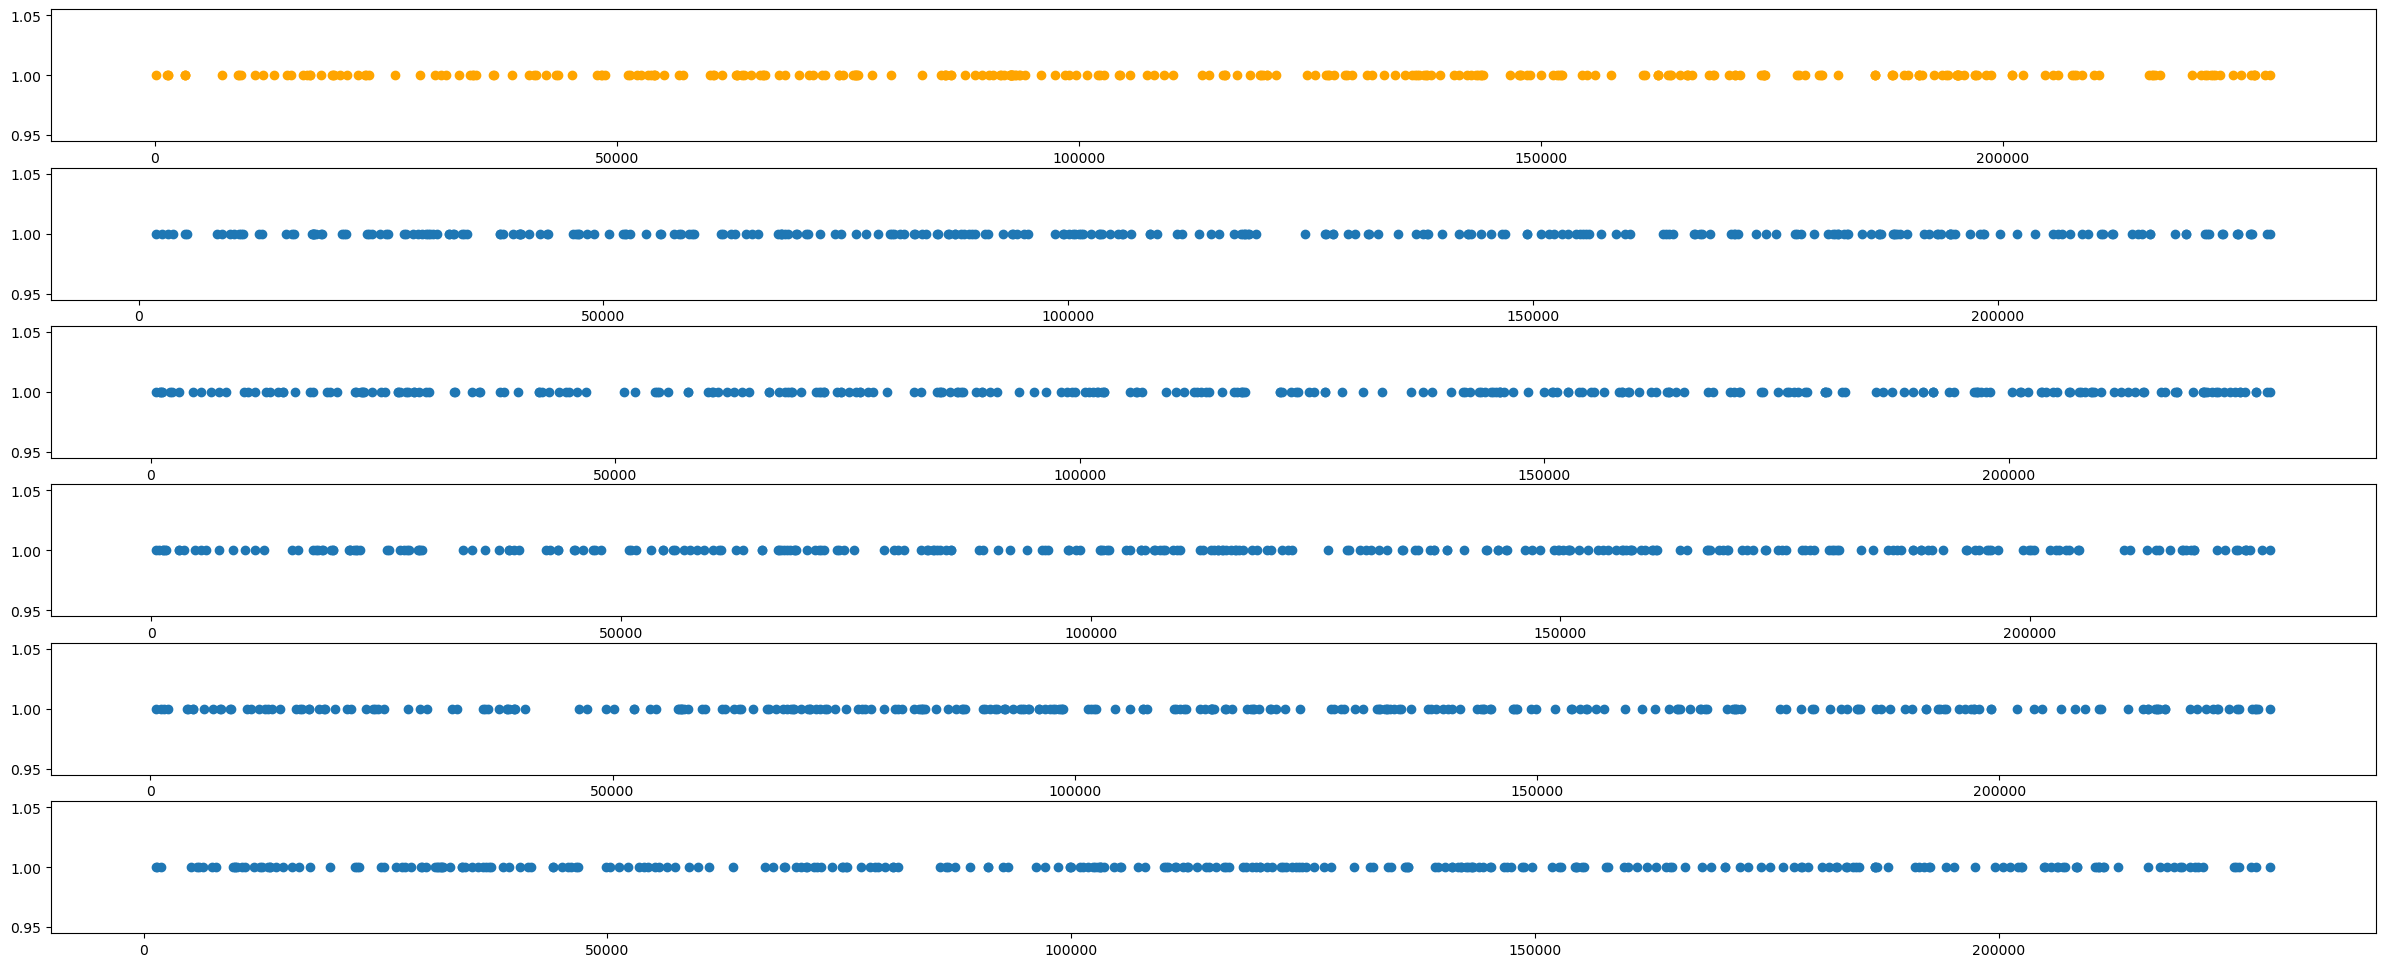

In [10]:
N_samples = 5
samples = generate_DNA_samples(N_samples)

plt.figure(figsize=(30,(N_samples + 1) * 2))
plt.subplot(N_samples + 1,1,1)
plt.scatter(x=cmv_locations,y= [1] * len(cmv_locations),color='orange')

for i, sample in enumerate(samples):
    plt.subplot(N_samples + 1,1,i+2)
    plt.scatter(x=sample,y= [1] * len(sample))


plt.show()

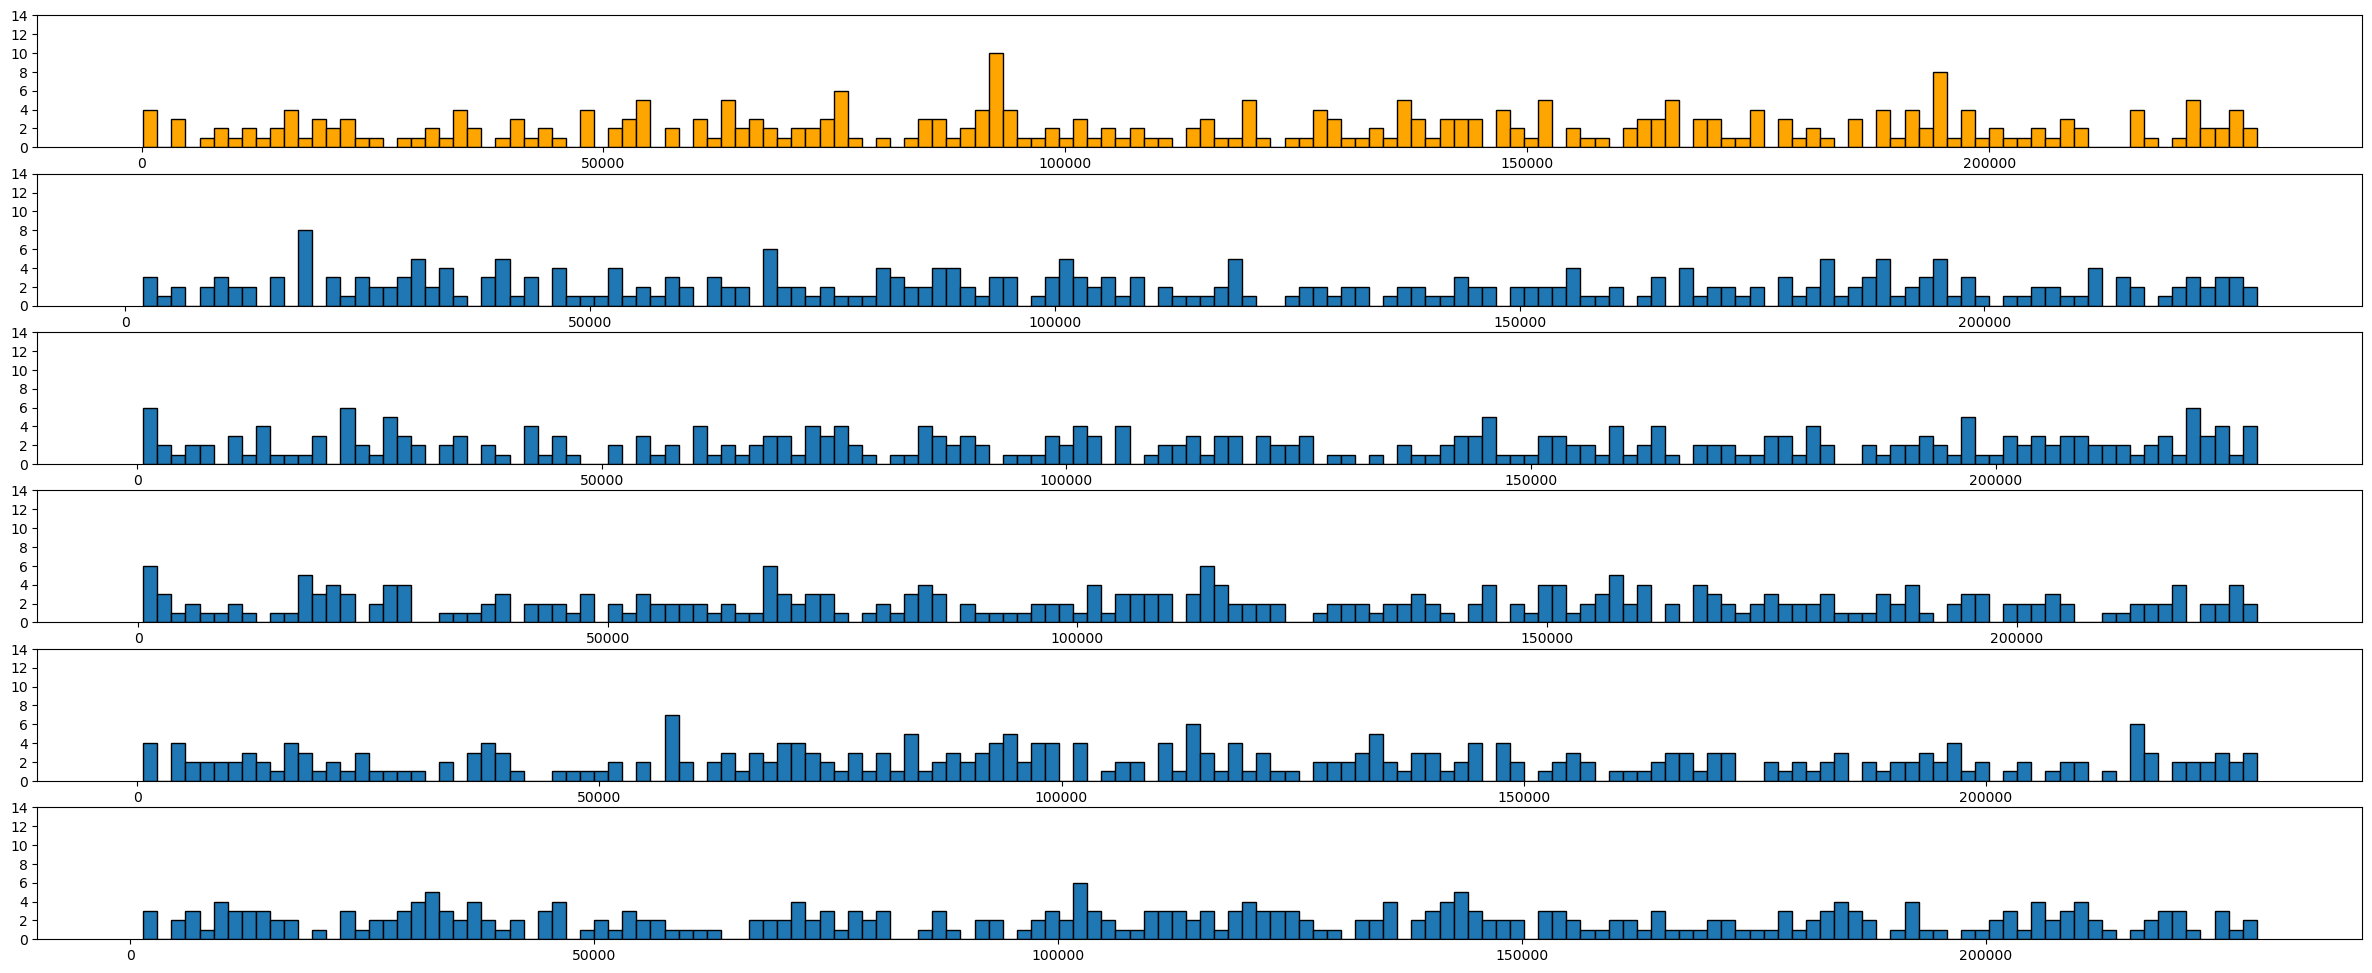

In [11]:
plt.figure(figsize=(30,(N_samples + 1) * 2))
plt.subplot(N_samples + 1,1,1)
plt.hist(x=cmv_locations,bins=150,color='orange',edgecolor='black')
plt.yticks(range(0,16,2))


for i, sample in enumerate(samples):
    plt.subplot(N_samples + 1,1,i+2)
    plt.hist(x=sample,bins=150,edgecolor='black')
    plt.yticks(range(0,16,2))


plt.show()

#### Observations

We can see that there is no much difference between CMV and random sample points locations and I cannot make inferences from these graphical representations only.

## Spaces

Let us analyze the spacings between the palyndromes from the input data and random scatter ones.

`convolve_size` variable is responsible for the numbers of neighboring spacings we sum. If it is set to 1, it is the same as simply calculate spacings on their own

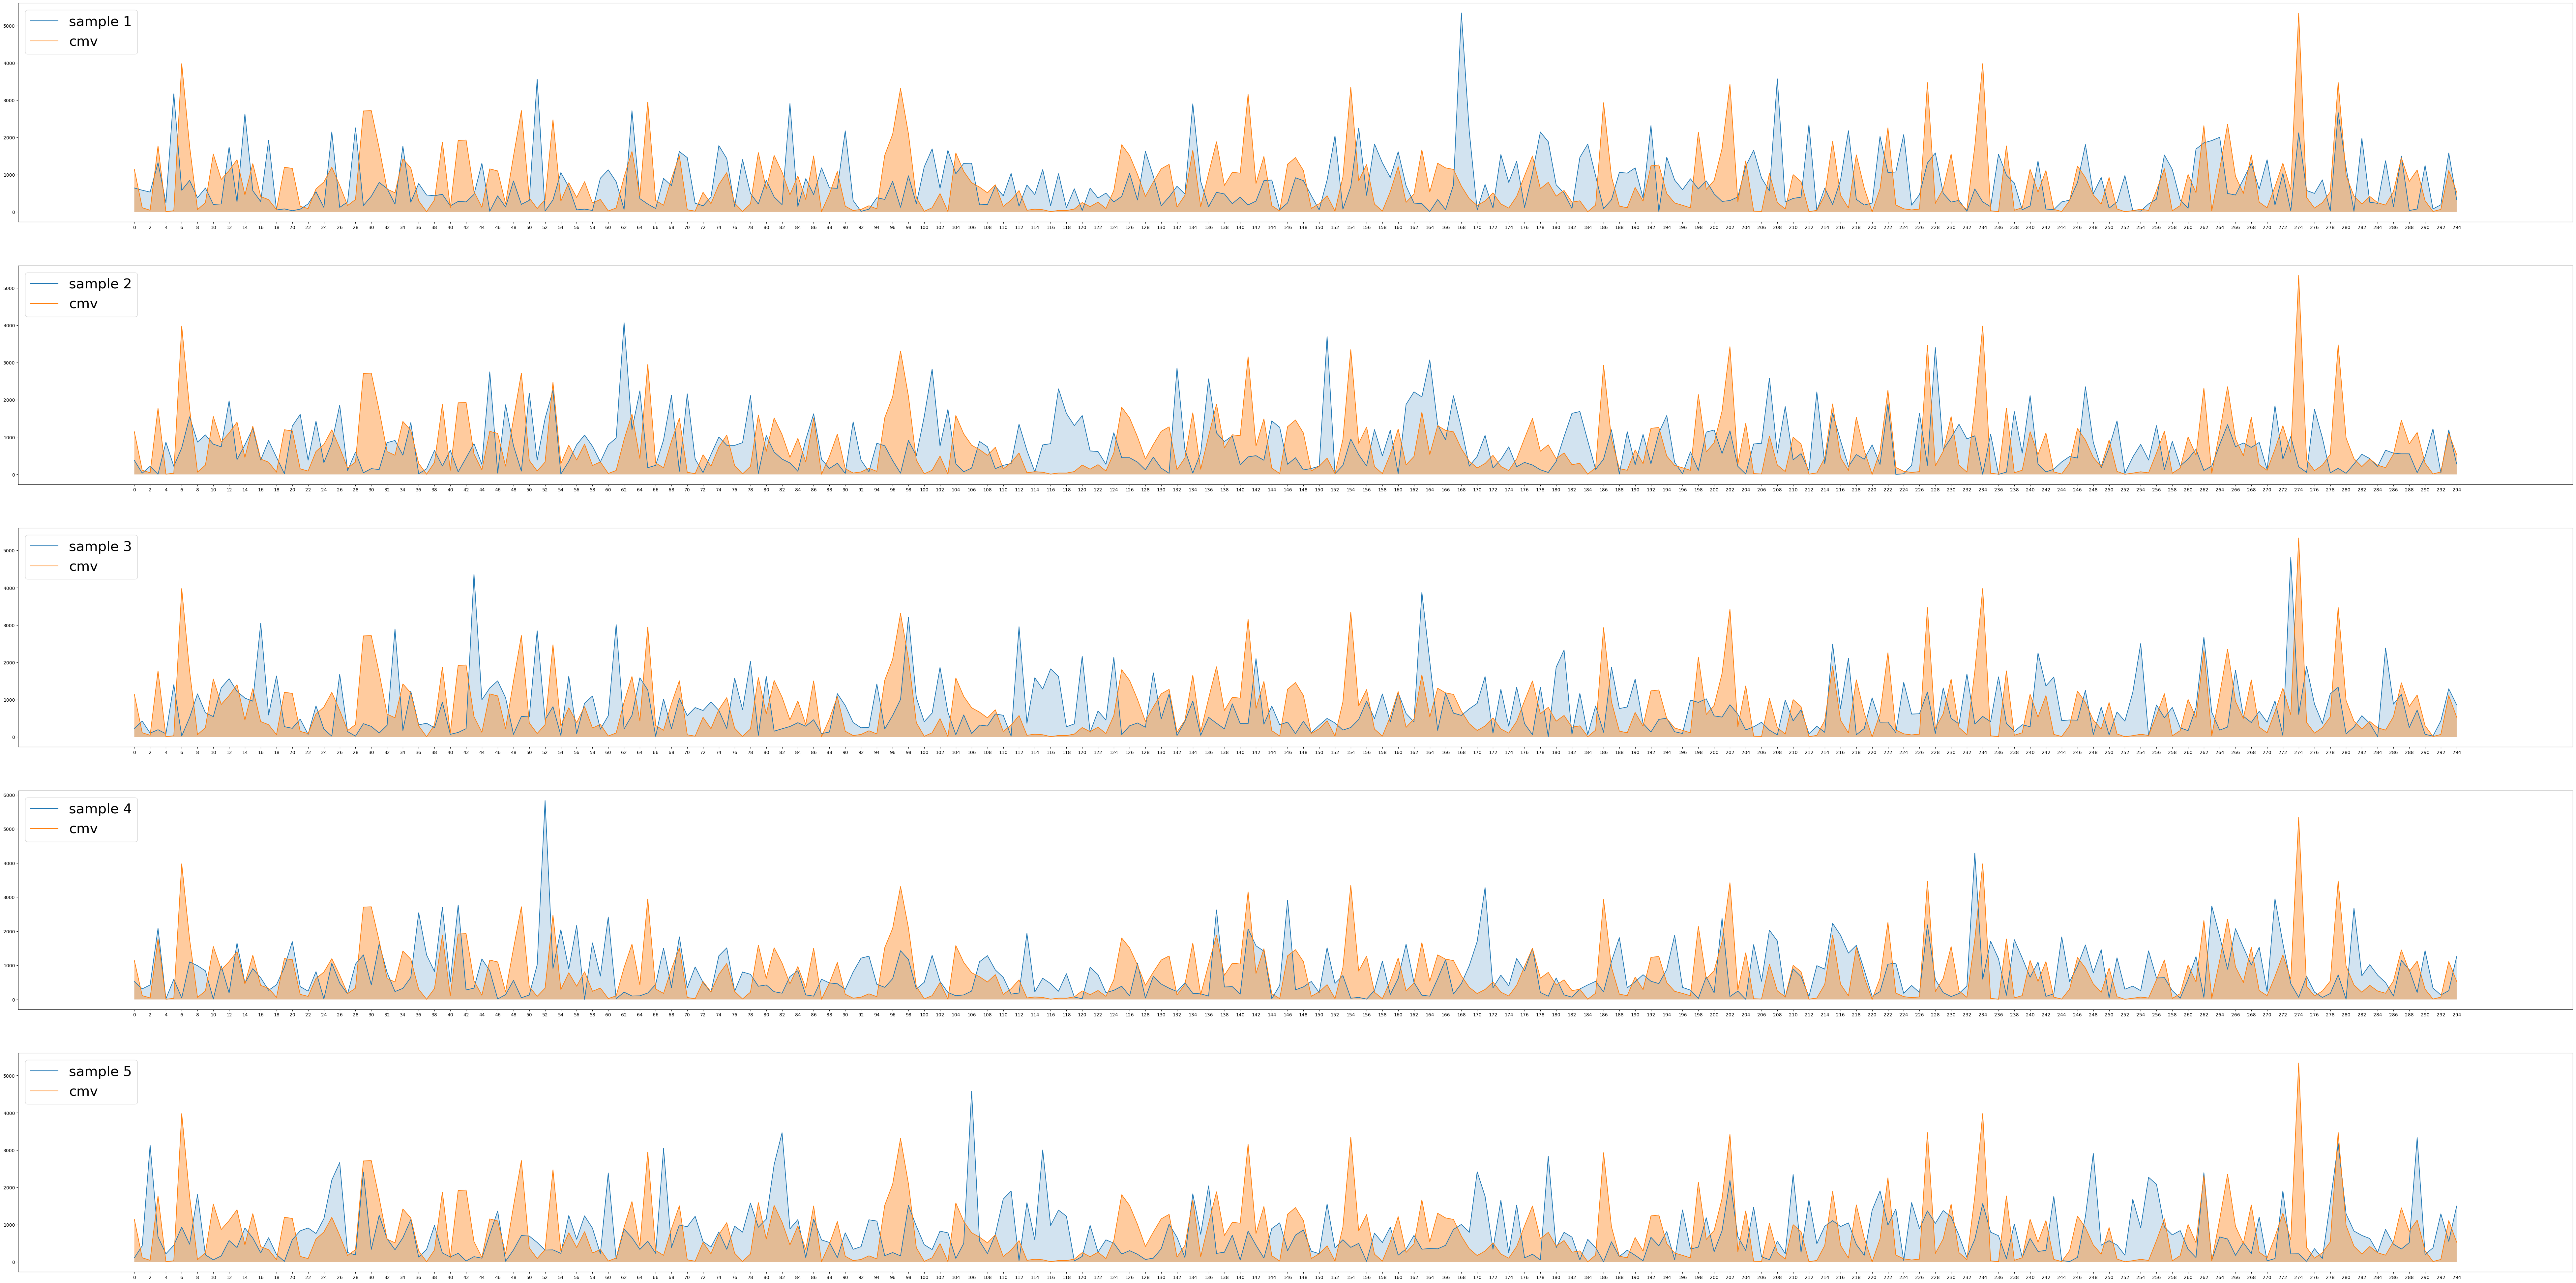

In [12]:
import numpy as np

convolve_size = 1


def calculate_spacings(arr):
    spacings = []
    for i in range (len(arr)-1):
        spacings.append(arr[i+1] - arr[i])
    return spacings

cmv_spacings = calculate_spacings(cmv_locations)

samples_spacings = np.array([calculate_spacings(sample) for sample in samples])

cmv_convolved_spacings = np.convolve(cmv_spacings, np.ones(convolve_size),"valid")
sample_convolved_spacings = [np.convolve(spacings, np.ones(convolve_size),"valid")for spacings in samples_spacings]

plt.figure(figsize=(100,N_samples * 10))

for i, spacings in enumerate(sample_convolved_spacings):
    plt.subplot(N_samples,1,i+1)
    plt.plot(range(len(spacings)),spacings, label= "sample {}".format(i+1))
    plt.fill_between(range(len(spacings)),spacings,alpha=0.2)
    plt.plot(cmv_convolved_spacings, label="cmv")
    plt.fill_between(range(len(cmv_convolved_spacings)),cmv_convolved_spacings,alpha=0.4)
    plt.xticks(range(0,len(spacings),2))
    plt.legend(loc="upper left",fontsize=30)

plt.show()


#### Observations

We cannot see significant tendency in spacings above, as both random samples and CMV has sharp peaks, falls, some more uniform "mountains". Though, random samples dont tend to show us such long low platos as CMV. It means that CMV has several segments with quite big sets of palindromes sitting closely to each other. See (90, 94 - [75622 - 76043 DNAs nucleotides]),(111, 120 - [91637 - 92859]), (251, 255 - [195032 - 195221]), (223, 226 - [173863 - 174185]) segments of the orange plots.

## Counts

Here, we will divide the DNA into parts with equal length and count how many palyndromes we have in each part. Then, run tests to see if the CMV distribution is got by chance.

In [13]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

def get_parts(locations, n_parts):
    dna = range(1, dna_length)
    dna_parts = list(split(dna,n_parts))
    blocs = []
    for i in range(n_parts):
        blocs.append([])
    for location in locations:
        for i in range (n_parts):
            if(location in dna_parts[i]):
                blocs[i].append(location)
                break;
    return blocs

Before we proceed splitting and running tests, we should tune the number of samples so that we balance between undetecting deviations due to low variance (big segments) and dividing clusters into different groups (small segments).

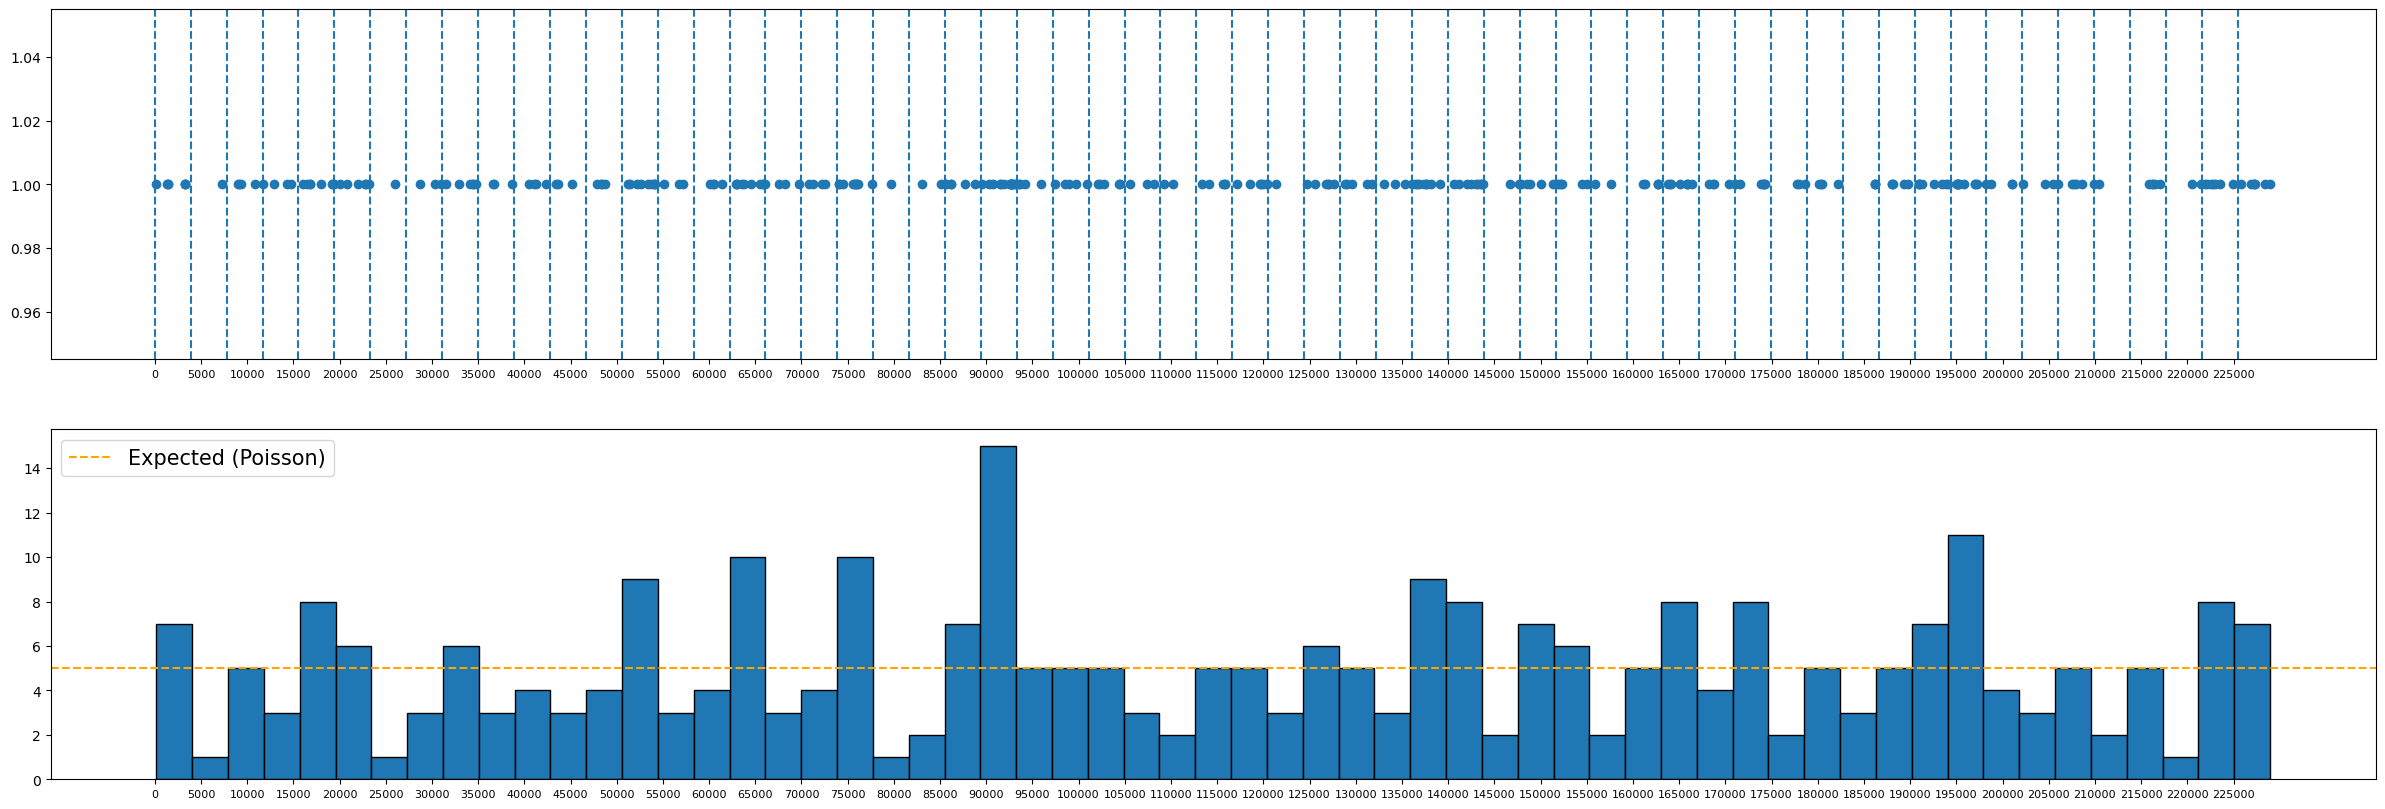

In [14]:
N_parts = 59

cmv_parts = get_parts(cmv_locations,N_parts)

cmv_counts = [len(arr) for arr in cmv_parts]

plt.figure(figsize=(30,10))
plt.subplot(2,1,1)
plt.scatter(cmv_locations, [1] * len(cmv_locations))
for r in list(split(range(1,dna_length+1),N_parts)):
    plt.axvline(r[0],linestyle='dashed')
plt.xticks(range(0,dna_length + 1,5000),fontsize=8)

plt.subplot(2,1,2)
plt.hist(cmv_locations,bins=N_parts,edgecolor='black')
plt.axhline(np.mean(cmv_counts),linestyle='dashed',color='orange')
plt.xticks(range(0,dna_length + 1,5000),fontsize=8)
plt.legend(["Expected (Poisson)"],loc="upper left",fontsize=15)
plt.show()
# plt.hist(cmv_locations,bins=N_parts)




I stopped at dividing our DNA into 59 slices of equal length, and on the graph above we can see that major clusters (that we obsereved earlier) of palyndromes are not splitted into neighboring groups.

To test if the CMV dataset with such clusters was just a matter of chance or not, we will proceed a chi-square test where the null hypothesis claims that our CMV slices counts (the number of palyndromes in each cluster) are taken from Poisson distribution with the parameter lambda = DNA_length / number_of_slices.

We take a Poisson distribution, since taking random samples from uniform distribution (as was done earlier) leads to the Poisson distribution of counts of observations in slices.

In [15]:
from scipy.stats import chisquare

chisquare(cmv_counts, [palindrome_count/N_parts]* N_parts)


Power_divergenceResult(statistic=91.88513513513514, pvalue=0.0030479467913747038)

Here, we can see that the p-value is really small (p-value < 0.005). So, we have a strong reason to reject the null hypothesis and agree that such CMV DNA palyndromes clusters were not a matter of chance and may be significant places to start searching for the origin of replication.

In [16]:
N=100

sample_size = 50

alphas = [0.05,0.01,0.005]

for alpha in alphas:
    stats_for_mean = []
    for n in range(N):
        samples = generate_DNA_samples(sample_size)

        stats = []

        for sample in samples:
            parts = get_parts(sample, N_parts)
            counts = [len(arr) for arr in parts]
            stats.append(chisquare(counts, [palindrome_count/N_parts]* N_parts)[1])
        
        stats = np.array(stats)
        stats_for_mean.append(np.count_nonzero(stats < alpha)/sample_size)
    print("alpha =", alpha, ":",np.mean(stats_for_mean))
    

alpha = 0.05 : 0.053599999999999995
alpha = 0.01 : 0.0082
alpha = 0.005 : 0.005600000000000001


If we run the same procedure on random samples from uniform distribution, we get at average ~ 5% of samples that reject the null hypothesis on alpha = 0.05, ~ 1.4% for alpha = 0.01 and ~ 0.7% for alpha = 0.005 that is explained by type 1 error. (Numbers may chage by different runs)

## Conclusion


The case study showed that the locations of palyndromes discovered in CMV DNA are not there by chance (by chi-square test) and differ from random scatters taken from uniform distribution.
For the biologists to find an origin of replication I would recommend start by picking a high density palindromes areas which are [91637 - 92859], [195032 - 195221], [173863 - 174185], [75622 - 76043] ordered by decreasing of count of observations found in a region. If researching these regions give no result, one may continue search in regions that have above average density of palindromes shown on histogram in "Counts" section.